In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import cifar100
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import sys
import numpy as np
from sklearn.preprocessing import MinMaxScaler

## Importation of the module to compute neural networks K-complexity

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path_to_module = '/content/drive/MyDrive'
sys.path.append(path_to_module)

import neural_network_k_complexity

Mounted at /content/drive


# Preprocessing of the CIRFA-100 data

In [ ]:
def load_data():
  (X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode="fine")
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)
  X_train = X_train.reshape(40000, 3072)
  X_val = X_val.reshape(10000, 3072)
  X_test = X_test.reshape(10000,3072)
  X_train = X_train.astype('float32')
  X_val = X_val.astype('float32')
  X_test = X_test.astype('float32')
  X_train /= 255
  X_val /= 255
  X_test /= 255
  nb_classes = 100
  Y_train = to_categorical(y_train, nb_classes)
  Y_val = to_categorical(y_val, nb_classes)
  Y_test = to_categorical(y_test, nb_classes)
  return X_train, Y_train, X_val, Y_val, X_test, Y_test

In [ ]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = load_data()

169001437/169001437 [==============================] - 4s 0us/step


# Baseline model

### Creation and training of the baseline model 

In [ ]:
baseline_model = Sequential([
    Dense(100,input_shape=(3072,),activation='softmax')
    ])

baseline_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

earlyStop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, mode='min', verbose = 1)

baseline_model.fit(X_train, Y_train, batch_size=64, epochs=20, validation_data=(X_val, Y_val), callbacks=[earlyStop])

loss, accuracy = baseline_model.evaluate(X_test, Y_test)
print('Test accuracy:', accuracy)
print('Test loss:', loss)

Epoch 1/20
625/625 [==============================] - 5s 4ms/step - loss: 4.3045 - accuracy: 0.0605 - val_loss: 4.1047 - val_accuracy: 0.0895
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 4.0074 - accuracy: 0.1077 - val_loss: 3.9847 - val_accuracy: 0.1087
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 3.8934 - accuracy: 0.1297 - val_loss: 3.9172 - val_accuracy: 0.1209
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 3.8259 - accuracy: 0.1420 - val_loss: 3.8699 - val_accuracy: 0.1269
Epoch 5/20
625/625 [==============================] - 2s 4ms/step - loss: 3.7761 - accuracy: 0.1506 - val_loss: 3.8376 - val_accuracy: 0.1399
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 3.7391 - accuracy: 0.1606 - val_loss: 3.8250 - val_accuracy: 0.1365
Epoch 7/20
625/625 [==============================] - 2s 4ms/step - loss: 3.7086 - accuracy: 0.1653 - val_loss: 3.7876 - val_accuracy: 0.1445
Epoch 

### Evaluation of the baseline model

In [ ]:
model_name=[]
accuracy_list = []

loss_memory_results = []
loss_neurons_results = []
loss_parameters_results = []

accuracy_memory_results = []
accuracy_neurons_results = []
accuracy_parameters_results = []

model_name.append("baseline model")
accuracy_list.append(accuracy)

loss_memory_results.append(neural_network_k_complexity.complexity_evaluation(baseline_model, X_test, Y_test, "loss", "memory"))
loss_neurons_results.append(neural_network_k_complexity.complexity_evaluation(baseline_model, X_test, Y_test, "loss", "neurons"))
loss_parameters_results.append(neural_network_k_complexity.complexity_evaluation(baseline_model, X_test, Y_test, "loss", "parameters"))

accuracy_memory_results.append(neural_network_k_complexity.complexity_evaluation(baseline_model, X_test, Y_test, "accuracy", "memory"))
accuracy_neurons_results.append(neural_network_k_complexity.complexity_evaluation(baseline_model, X_test, Y_test, "accuracy", "neurons"))
accuracy_parameters_results.append(neural_network_k_complexity.complexity_evaluation(baseline_model, X_test, Y_test, "accuracy", "parameters"))

#Experiments with differents model size

For this part, we will create a lot of model with differents size.

For length variation, they will have between 2 and 16 layers, by increments of 2. For width variation, they will have between 128 and 4086 neurons units, by 2 times a power of 2 increments.

### Creation and training of the models

In [ ]:
#variation in size
for size in [2**k for k in range(7,13,2)]:
  #variation in length
  for length in range(0,14,2):

    #building model
    model = Sequential([])
    model.add(Dense(1024,input_shape=(3072,), activation='relu'))
    for j in range(length):
      model.add(Dense(size, activation='relu'))
    model.add(Dense(100,activation='softmax'))

    #computing model name
    model_name.append("couches_"+str(length+2)+"_epaisseur_"+str(size))

    #get the model summary
    model.build((784,))
    model.summary()

    #training the model
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    earlyStop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, mode='min', verbose = 0)
    model.fit(X_train, Y_train, batch_size=64, epochs=20, verbose=0, validation_data=(X_val, Y_val), callbacks=[earlyStop])

    #evaluating the model
    loss, accuracy = model.evaluate(X_test, Y_test,verbose=0)
    print('Test accuracy:', accuracy)
    print('Test loss:', loss)

    accuracy_list.append(accuracy)

    #computing the neural network K-complexity
    loss_memory_results.append(neural_network_k_complexity.complexity_evaluation(model, X_test, Y_test, "loss", "memory"))
    loss_neurons_results.append(neural_network_k_complexity.complexity_evaluation(model, X_test, Y_test, "loss", "neurons"))
    loss_parameters_results.append(neural_network_k_complexity.complexity_evaluation(model, X_test, Y_test, "loss", "parameters"))

    accuracy_memory_results.append(neural_network_k_complexity.complexity_evaluation(model, X_test, Y_test, "accuracy", "memory"))
    accuracy_neurons_results.append(neural_network_k_complexity.complexity_evaluation(model, X_test, Y_test, "accuracy", "neurons"))
    accuracy_parameters_results.append(neural_network_k_complexity.complexity_evaluation(model, X_test, Y_test, "accuracy", "parameters"))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_2 (Dense)             (None, 100)               102500    
                                                                 
Total params: 3,249,252
Trainable params: 3,249,252
Non-trainable params: 0
_________________________________________________________________
Test accuracy: 0.23499999940395355
Test loss: 3.2898342609405518
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_4 (Dense)             (None, 128)               131200    
                       

### Results display

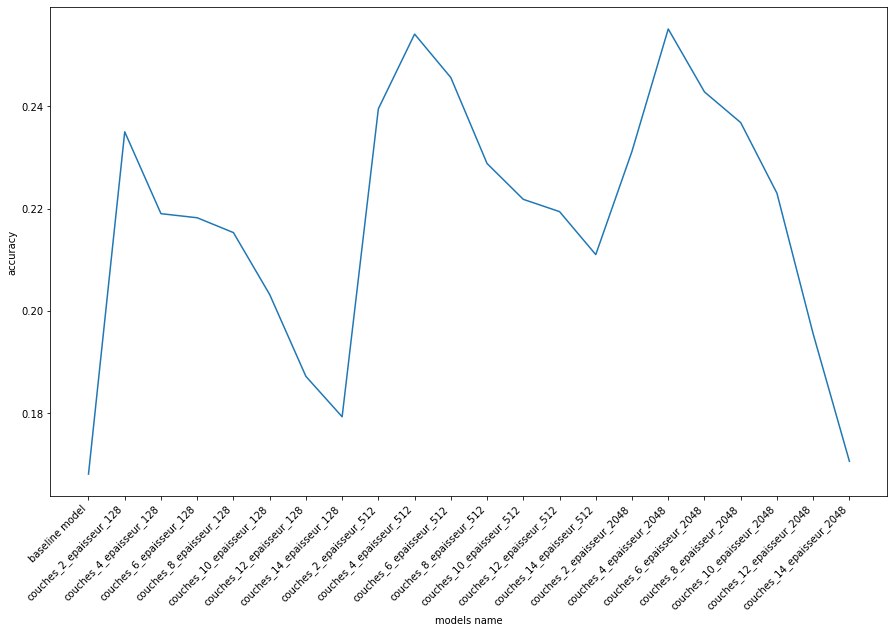

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(model_name, accuracy_list)
xaxis = np.arange(len(model_name))
ax.set_xticks(xaxis)
ax.set_xticklabels(model_name)
ax.set_ylabel("accuracy")
ax.set_xlabel("models name")
fig.autofmt_xdate(rotation=45)

In [ ]:
df_loss_memory_results = pd.DataFrame(loss_memory_results, model_name).sort_values(by=[0], ascending=False)
df_loss_neurons_results = pd.DataFrame(loss_neurons_results, model_name).sort_values(by=[0], ascending=False)
df_loss_parameters_results = pd.DataFrame(loss_parameters_results, model_name).sort_values(by=[0], ascending=False)

df_accuracy_memory_results = pd.DataFrame(accuracy_memory_results, model_name).sort_values(by=[0], ascending=False)
df_accuracy_neurons_results = pd.DataFrame(accuracy_neurons_results, model_name).sort_values(by=[0], ascending=False)
df_accuracy_parameters_results = pd.DataFrame(accuracy_parameters_results, model_name).sort_values(by=[0], ascending=False)

df_total = pd.concat([df_loss_memory_results, df_loss_neurons_results, df_loss_parameters_results, df_accuracy_memory_results, df_accuracy_neurons_results, df_accuracy_parameters_results], axis=1)
df_total.columns = ["loss_memory","loss_neurons","loss_parameters","accuracy_memory","accuracy_neurons","accuracy_parameters"]
df_total

,loss_memory,loss_neurons,loss_parameters,accuracy_memory,accuracy_neurons,accuracy_parameters
baseline model,0.227450,0.002691,8.757553e-07,0.142072,0.001681,5.470225e-07
couches_2_epaisseur_512,0.024536,0.000271,9.369529e-08,0.019302,0.000213,7.370927e-08
couches_2_epaisseur_128,0.024498,0.000270,9.354974e-08,0.018940,0.000209,7.232434e-08
couches_2_epaisseur_2048,0.024310,0.000268,9.283060e-08,0.018633,0.000206,7.115484e-08
couches_4_epaisseur_128,0.023833,0.000218,9.105227e-08,0.017332,0.000159,6.621587e-08
couches_6_epaisseur_128,0.023673,0.000185,9.048523e-08,0.017090,0.000133,6.532175e-08
couches_8_epaisseur_128,0.023324,0.000159,8.920649e-08,0.016687,0.000114,6.382262e-08
couches_10_epaisseur_128,0.022760,0.000138,8.708667e-08,0.015590,0.000095,5.965179e-08
couches_12_epaisseur_128,0.022061,0.000121,8.444199e-08,0.014219,0.000078,5.442715e-08
couches_14_epaisseur_128,0.021643,0.000108,8.287750e-08,0.013484,0.000067,5.163451e-08


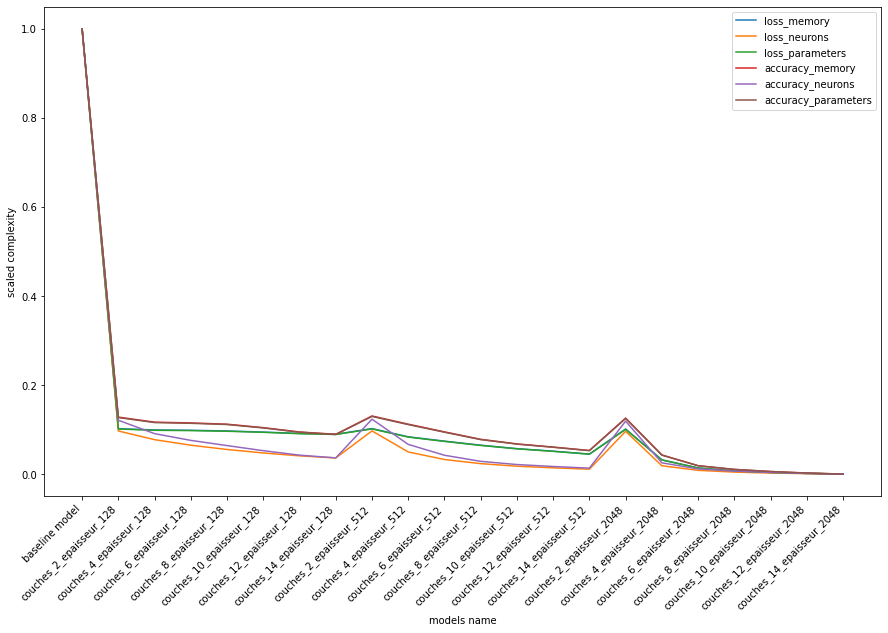

In [ ]:
loss_memory_results = np.array(loss_memory_results).reshape(-1,1)
loss_neurons_results = np.array(loss_neurons_results).reshape(-1,1)
loss_parameters_results = np.array(loss_parameters_results).reshape(-1,1)

accuracy_memory_results = np.array(accuracy_memory_results).reshape(-1,1)
accuracy_neurons_results = np.array(accuracy_neurons_results).reshape(-1,1)
accuracy_parameters_results = np.array(accuracy_parameters_results).reshape(-1,1)

scaled_loss_memory_results = MinMaxScaler().fit(loss_memory_results).transform(loss_memory_results)
scaled_loss_neurons_results = MinMaxScaler().fit(loss_neurons_results).transform(loss_neurons_results)
scaled_loss_parameters_results = MinMaxScaler().fit(loss_parameters_results).transform(loss_parameters_results)

scaled_accuracy_memory_results = MinMaxScaler().fit(accuracy_memory_results).transform(accuracy_memory_results)
scaled_accuracy_neurons_results = MinMaxScaler().fit(accuracy_neurons_results).transform(accuracy_neurons_results)
scaled_accuracy_parameters_results = MinMaxScaler().fit(accuracy_parameters_results).transform(accuracy_parameters_results)


fig, ax = plt.subplots(figsize = (15,10))

ax.plot(model_name, scaled_loss_memory_results, label="loss_memory")
ax.plot(model_name, scaled_loss_neurons_results, label="loss_neurons")
ax.plot(model_name, scaled_loss_parameters_results, label="loss_parameters")

ax.plot(model_name, scaled_accuracy_memory_results, label="accuracy_memory")
ax.plot(model_name, scaled_accuracy_neurons_results, label="accuracy_neurons")
ax.plot(model_name, scaled_accuracy_parameters_results, label="accuracy_parameters")
xaxis = np.arange(len(model_name))
ax.set_xticks(xaxis)
ax.set_xticklabels(model_name)
ax.set_ylabel("scaled complexity")
ax.set_xlabel("models name")
ax.legend()
fig.autofmt_xdate(rotation=45)

plt.show()